# Extract all the tables from image

In [1]:
from google.colab import files ##upload file 
uploaded = files.upload() ## my compter to google colab

Saving Saleem HDFC 9660-1623914564274 (1) (1).pdf to Saleem HDFC 9660-1623914564274 (1) (1) (1).pdf


install necessary library

In [2]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
!pip install pdf2image
!pip install easyocr

In [4]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [5]:
! pip install Pillow
! pip install pytesseract

##import necessary library


In [6]:
from pdf2image import convert_from_path
import pytesseract as tess
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw ,Image
import spacy

In [7]:
base_path="/content/drive/MyDrive/images"

# convert pdf into images

In [8]:
import os
pdfs = r"/content/Saleem HDFC 9660-1623914564274 (1) (1).pdf"
pages = convert_from_path(pdfs,grayscale=True,dpi=380,jpegopt={
    "quality": 100,
    "progressive": True,
    "optimize": True
})

i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(os.path.join(base_path,image_name), "JPEG")
    i = i+1

In [9]:
import cv2 
import pytesseract

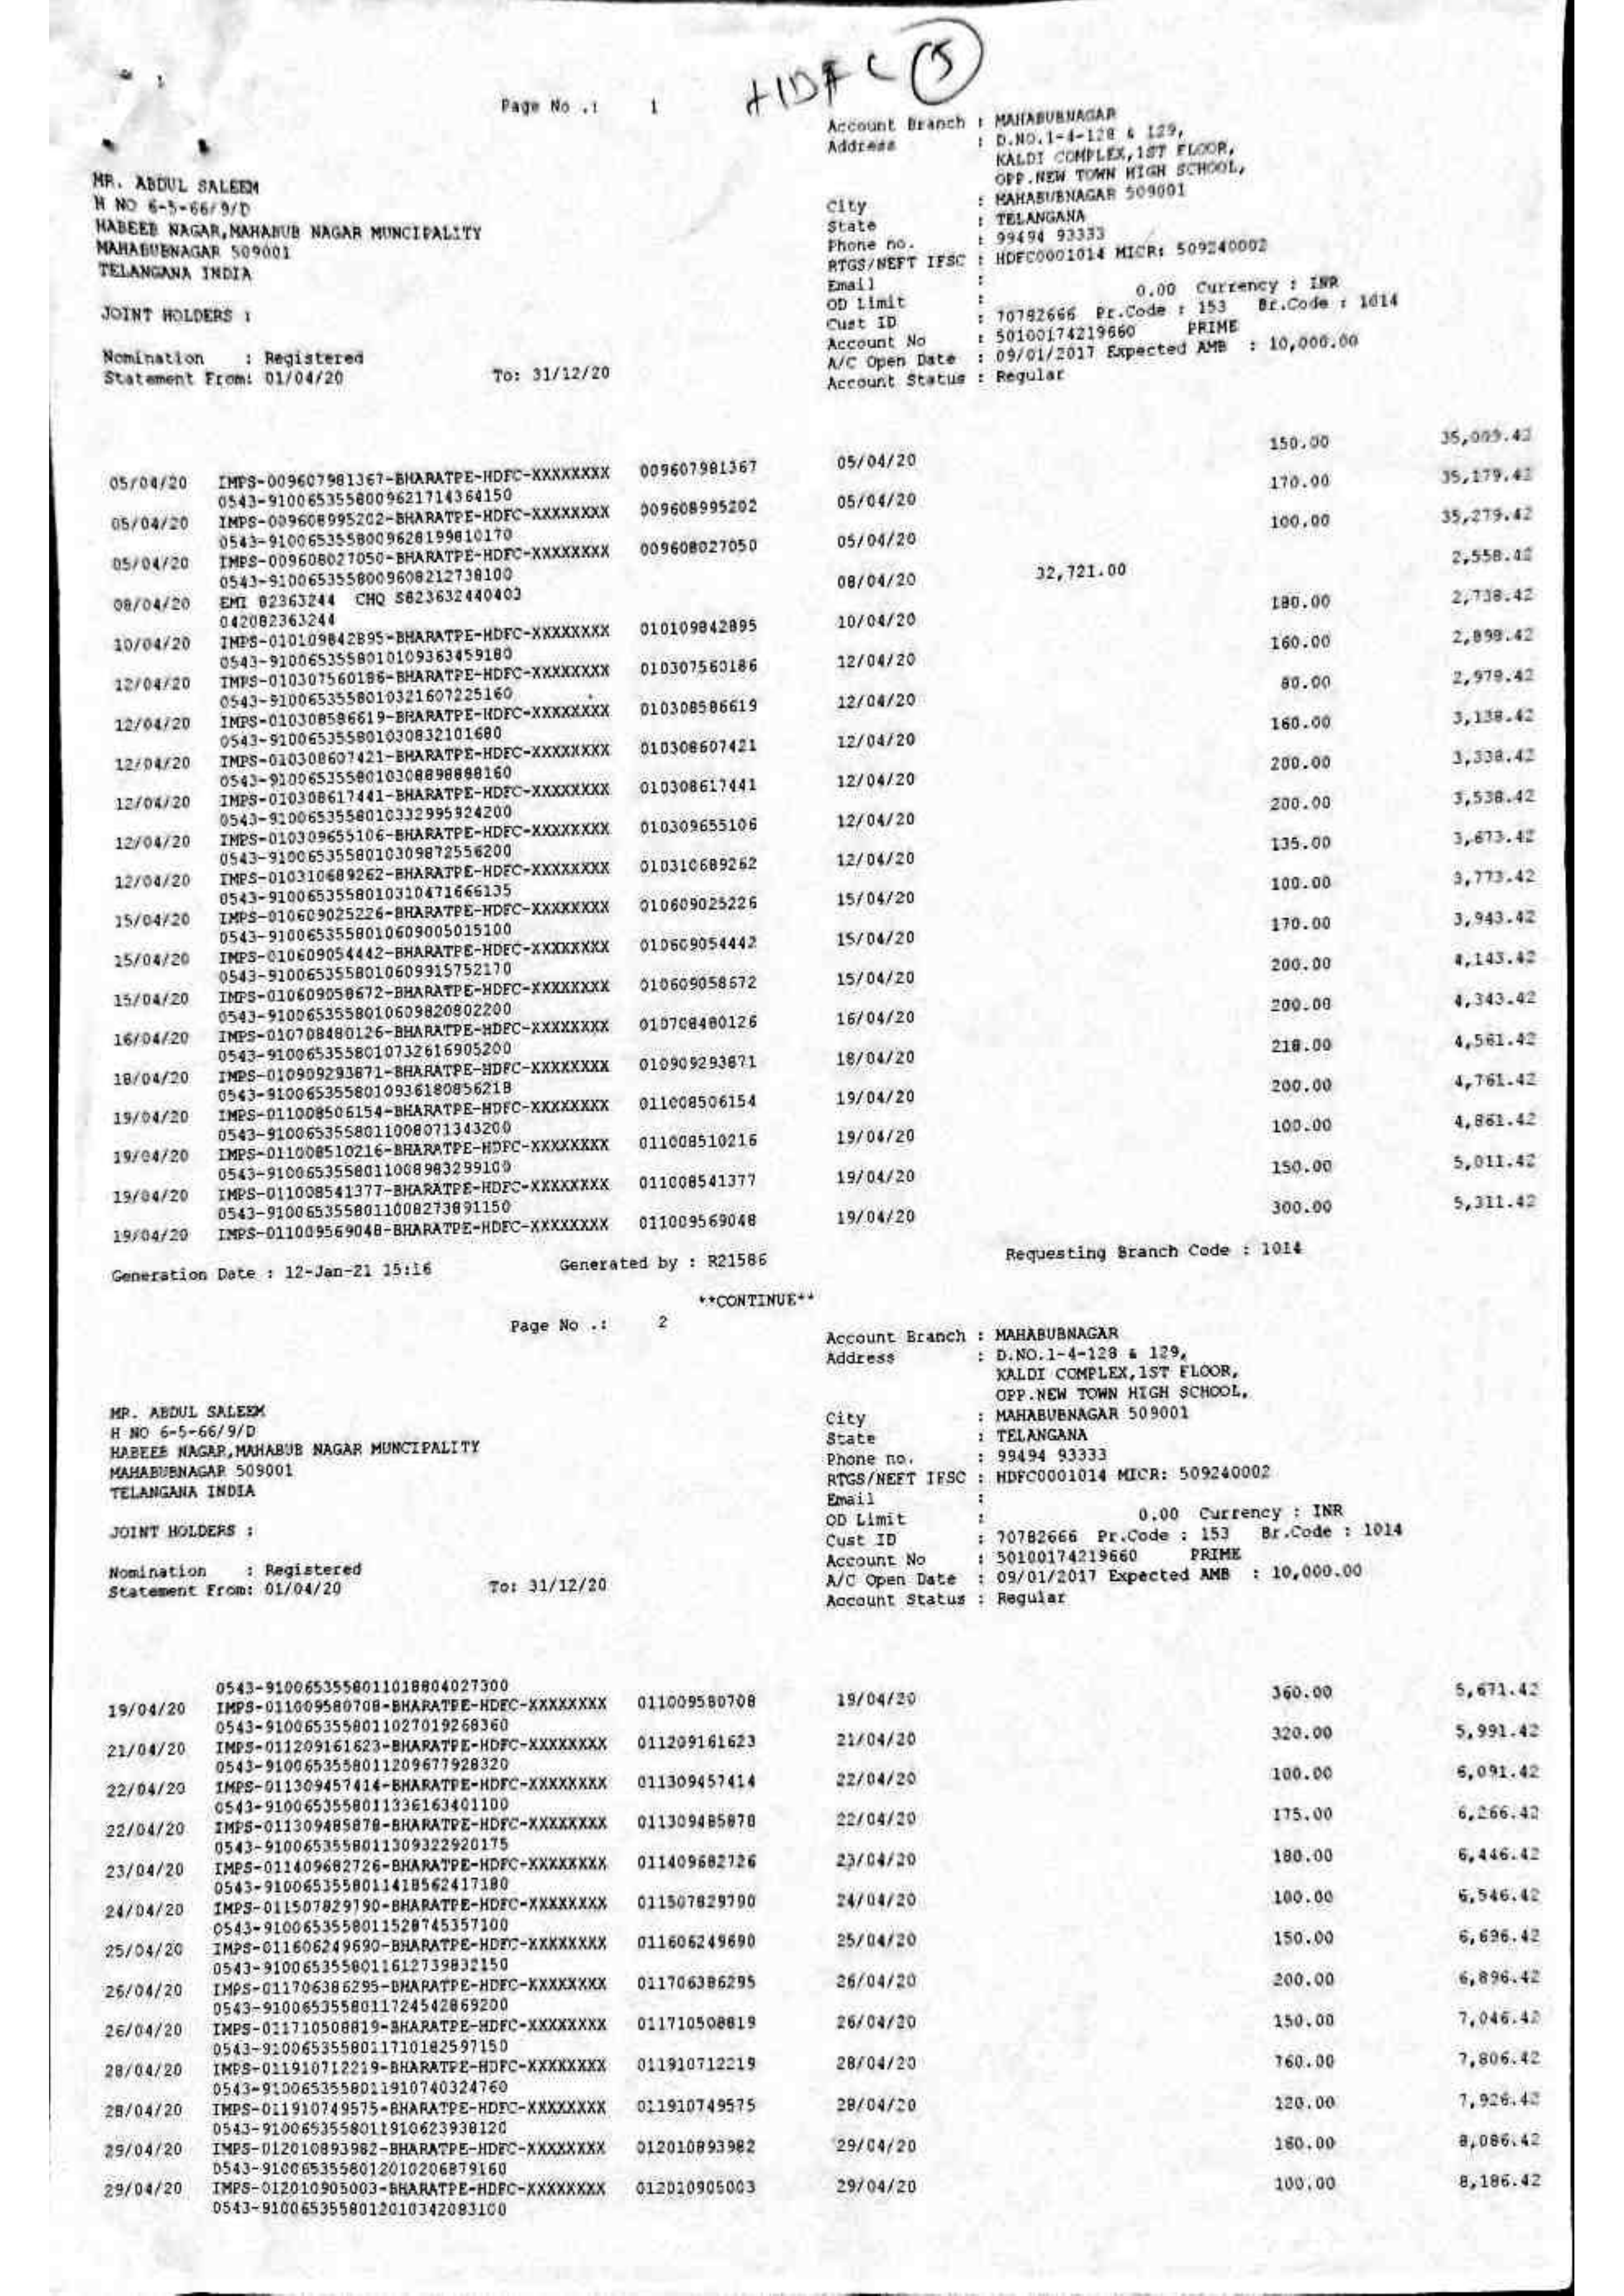

In [10]:
from IPython.display import display,Image  ###display image
display(pages[0])

# Table Extraction using easyocr

In [11]:
reader=easyocr.Reader(['en'])

In [12]:
#create bounding box 
bounds=reader.readtext(np.array(pages[0]),detail=1,decoder='greedy',beamWidth=10)
bounds

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[1055, 184], [1110, 184], [1110, 225], [1055, 225]],
  'No',
  0.7566048381199246),
 ([[1592, 213], [1876, 213], [1876, 264], [1592, 264]],
  'Arcount Danch',
  0.5475834649499474),
 ([[1912, 192], [2169, 192], [2169, 256], [1912, 256]],
  'Mniaduhnagar',
  0.03524096125769175),
 ([[2055, 239], [2165, 239], [2165, 280], [2055, 280]],
  'T-Le',
  0.12329343158164373),
 ([[2211, 233], [2283, 233], [2283, 273], [2211, 273]],
  '134',
  0.2084491149081467),
 ([[1923, 246], [2064, 246], [2064, 287], [1923, 287]],
  'D.MOA-',
  0.20358298352841067),
 ([[1593, 264], [1738, 264], [1738, 304], [1593, 304]],
  'Addr448',
  0.12162130442761798),
 ([[1917, 261], [2383, 261], [2383, 327], [1917, 327]],
  'NALDi ~ MHESFLOR',
  0.013692361812724657),
 ([[168, 321], [374, 321], [374, 383], [168, 383]],
  'AF , Abbul',
  0.13743069164162378),
 ([[1913, 294], [2419, 294], [2419, 366], [1913, 366]],
  'OHE,NIM Tor Mich Echol,',
  0.023456021649973176),
 ([[375, 340], [509, 340], [509, 381], [375, 381]

#Create a function to showing bounding box in image

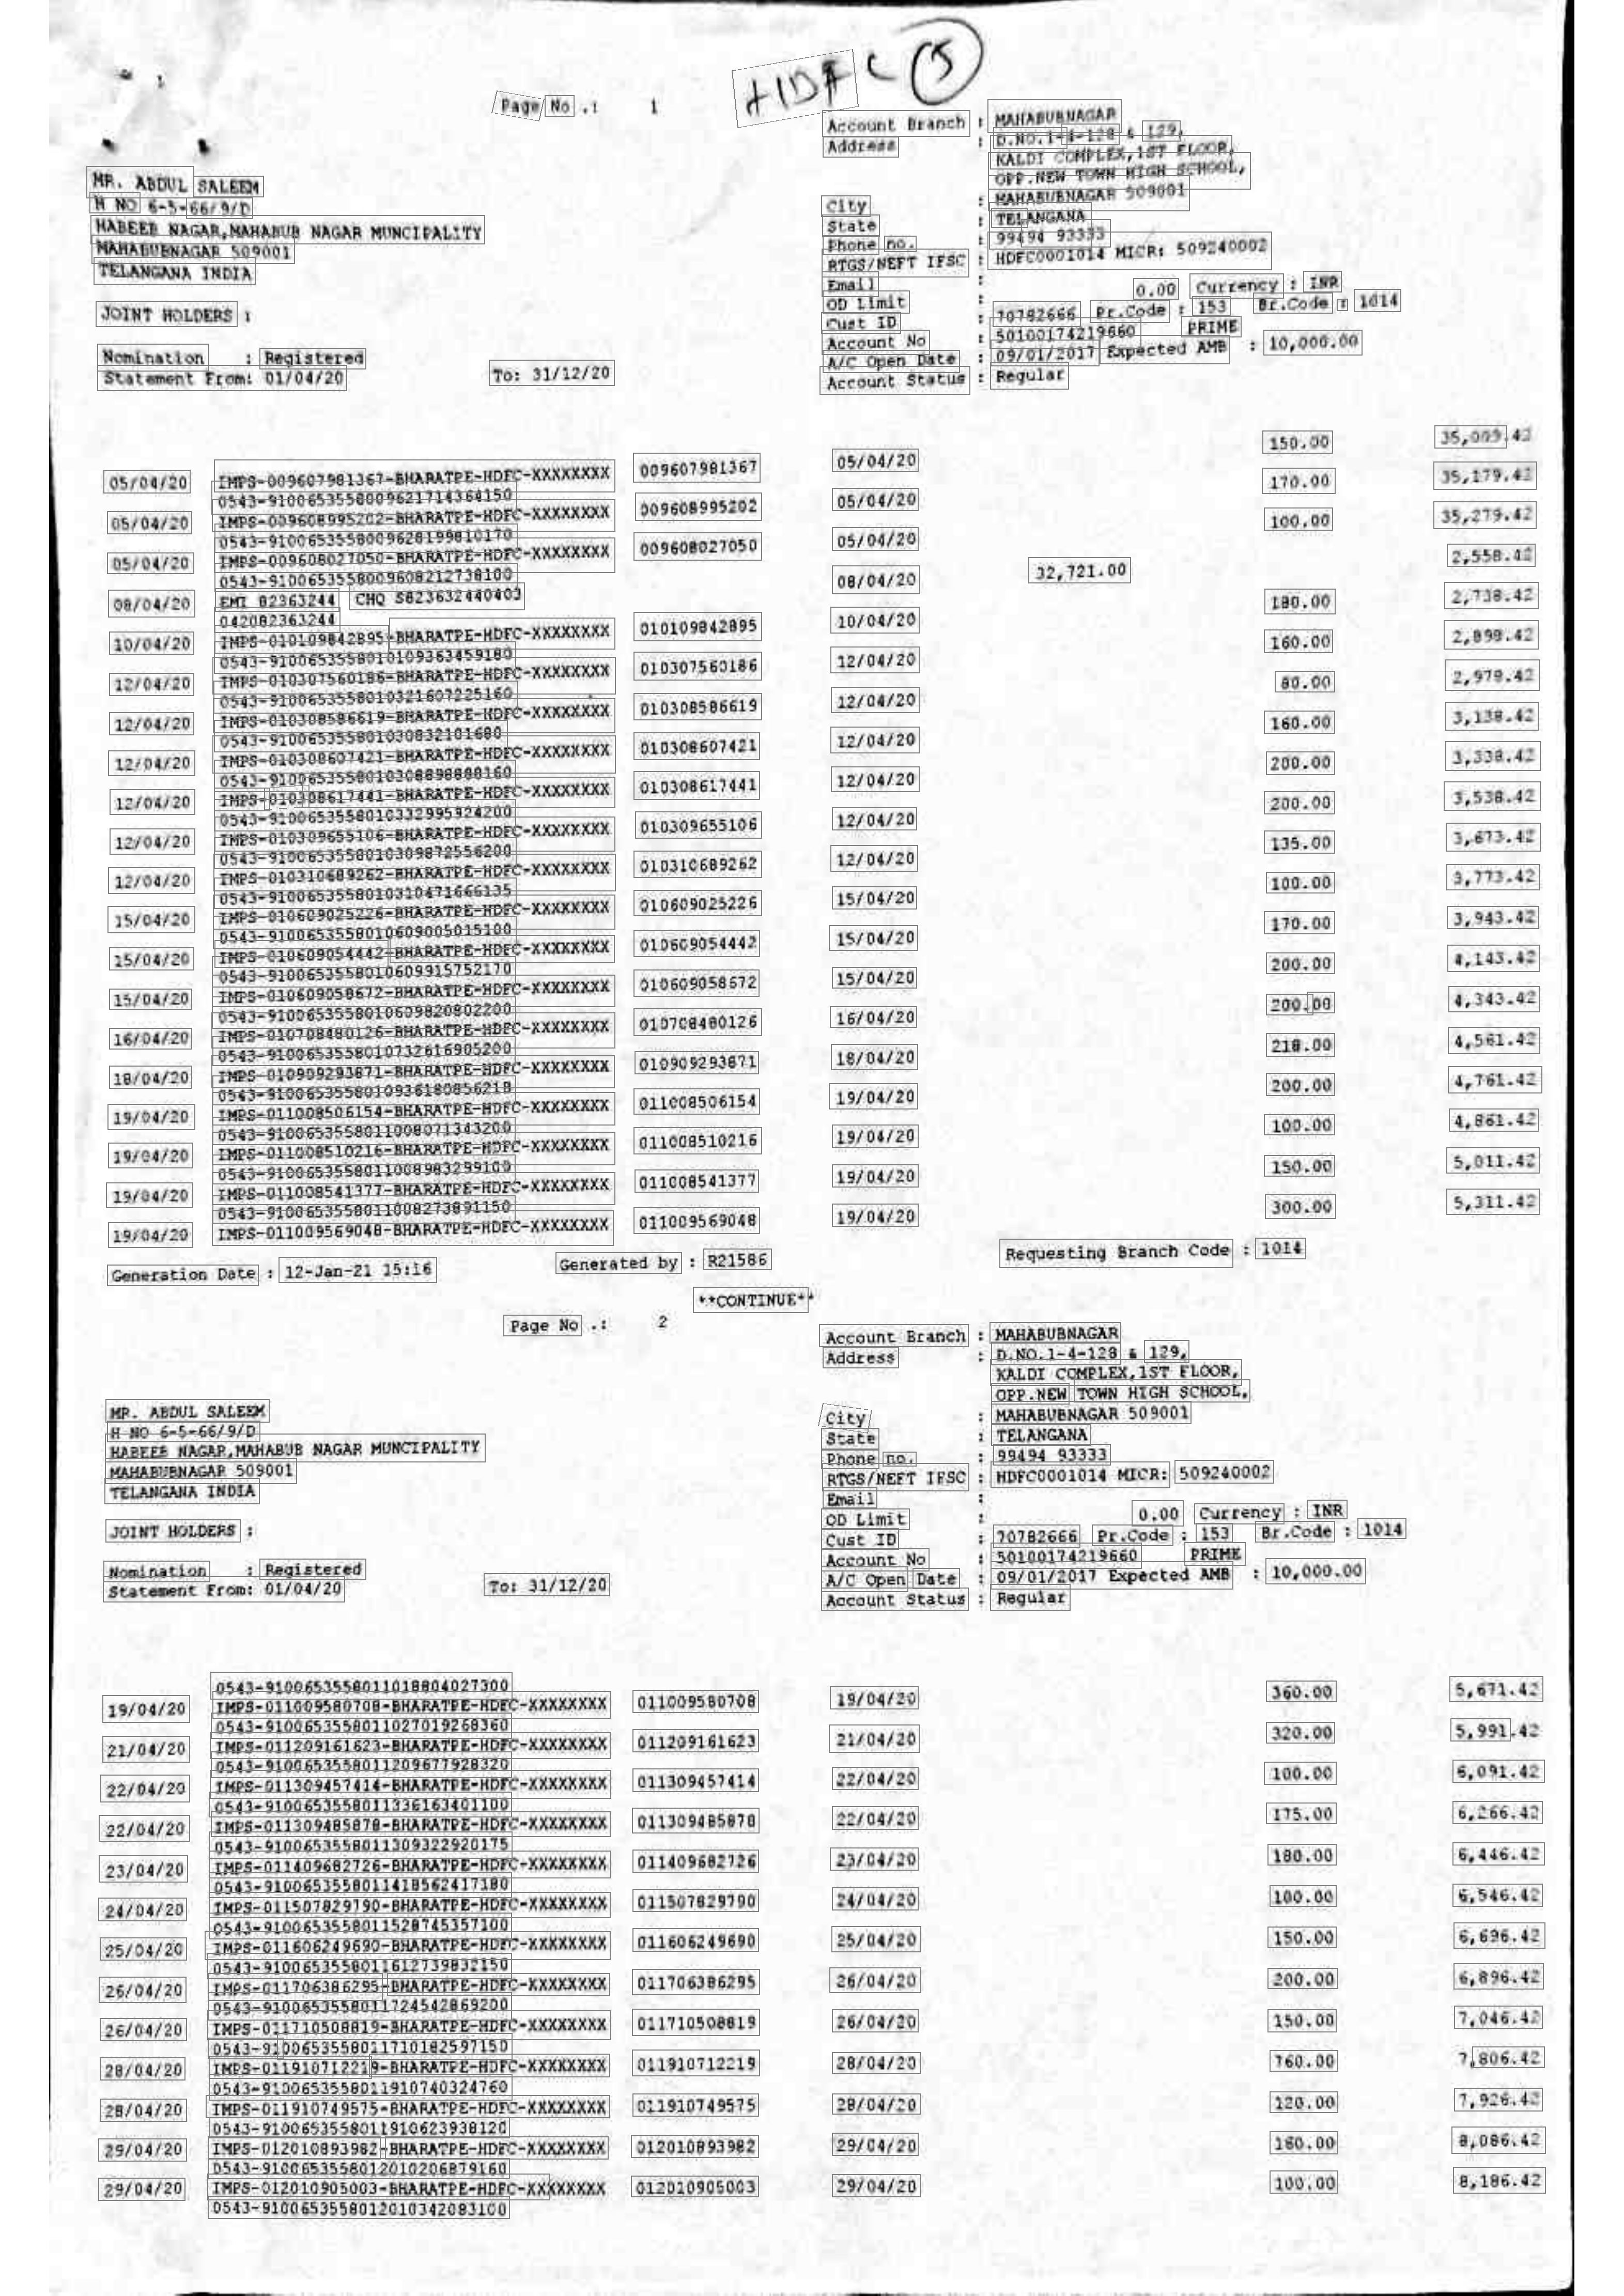

In [13]:
def drow_boxes(image,bounds,color='grey',width=2):  
    draw=ImageDraw.Draw(image)
    for bound in bounds:
      p0 ,p1 ,p2, p3 =bound[0]
      draw.line([*p0, *p1, *p2, *p3, *p0], fill=color ,width=width)
    return image 
drow_boxes(pages[0],bounds)   

##Run loop for show text

In [14]:
#show text 
text='' 
for i in range(len(bounds)):
  text=text + bounds[i][1] + '\n'
print(text)

No
Arcount Danch
Mniaduhnagar
T-Le
134
D.MOA-
Addr448
NALDi ~ MHESFLOR
AF , Abbul
OHE,NIM Tor Mich Echol,
SALEDI
YAHABMBNAGAF 50J0Q1
H Mo
66f 9/D
Clly
KaDEET NaGaR,Nahanud NAGAR MuncitalirY
Stato
Tol
35ongana
94 9773]
MAHAAUENAGAF 50900]
Phona
No .
HDEco0ozo  MICR: 509240002
TELANGAXX INDIA
RTGS /NEFT IFSC
EnaL ]
0.Vo
Cut(ancy
I
Joixt MOLDERS
0p ! mt
10192666
PE- Code
4153
Bc.Co [e
J
Jl
Cut i0
PRIHE
Account No
50102174219660
Epected A42
40,o00.0q
Ncmlnatton
Raqiatered
Nc Open Dit?
09/61/2017
Stat cment Ffon: 01/04/20
To: 31/12/20
~Accourt Scicils
Rcgular
450.00
J5,7
05/04/20
IhFs-009607901J67-BIARATPE-IIDFC-XXXxXXXX
'009607981J67
05/04/20
170.00
JS,179.4:
0547-9100653558009621714364150
009608995202
05/04/20
05/04/30
Ikps-0 9606595202-EKARATPE-HDFC-XXxxxXxX
Jco , 00
35,213.42
0542-9104652558009620 [99010170
009608027050
05/04/20
05404/20
Ihps-009608027050-BHARATPE-HDFC-XXxXXXXX
2,558.4 :
0543-310065125800 9608212739102_
08/04/20
32,721.00
00/04/20
E0 02363744
ChQ 582361244040]
L80 . Q0


In [15]:
text_data=text.split('\n')      #split text and Genrate a list
first_data=text_data[54:96]     
sec_data=text_data[263:365]
df_table=first_data + sec_data  #select a table formate data from the list

In [16]:
def split_X(a, n):              #Create a split_X function to split list , ang create group of variables
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [17]:
data=list(split_X(df_table,18)) #Run split_X function and create group of 8 variables
data[0]

['05/04/20',
 'IhFs-009607901J67-BIARATPE-IIDFC-XXXxXXXX',
 "'009607981J67",
 '05/04/20',
 '170.00',
 'JS,179.4:',
 '0547-9100653558009621714364150',
 '009608995202']

In [18]:
# import pandas as pd
import pandas as pd          #Create Dataframe from the group of variables

df = pd.DataFrame(data,columns =['1', '2','3','4','5','6','7','8'])
df

1  ...             8
0                                   05/04/20  ...  009608995202
1                                   05/04/20  ...      05/04/20
2                                   05404/20  ...   E0 02363744
3                          ChQ 582361244040]  ...  010109842095
4                                   10/04/20  ...          None
5   TMis-010jo75601es-BHARATPE-HDEC-XXXXXXXX  ...          None
6                                   22/04/22  ...          None
7                                   6,200.41  ...          None
8                                   180 . 00  ...          None
9                               011507029100  ...          None
10                              011606249690  ...          None
11                    DHAPATPE-HDEC-KxxxxkXX  ...          None
12  IXps-0:.71q508a19-BHARATPE-HCFC-XXXXXXXX  ...          None
13                          IkPs-0.19107[72;  ...          None
14            0543-9.006533580.1910740324760  ...          None
15            0543-910065355801[910623930120  ...          None
16                                  0,080,43  ...          None
17                                  0,186.42  ...          None

[18 rows x 8 columns]

# Table Extraction using pytesseract

##Create a loop for read text from all images
### Runing loop in all images and get text from all images

In [19]:
import glob
path="/content/drive/MyDrive/images/*.*"
x=[]
for file in glob.glob(path):
      text=pytesseract.image_to_string(file, config=r'--oem 3 --psm 6',lang='eng')
      x.append(text)

In [20]:
def listToString(s):    ##function for Converting list to striung
    str1 = " " 
    return (str1.join(s))

In [21]:
df=listToString(x)

In [22]:
##for remove punctuation
test_str = df
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for ele in df:
	if ele in punc:
		test_str = test_str.replace(ele, "")

In [23]:
import re
all_img_str =test_str
punc = r'[^\w\s]|[a-zA-z]+'
for ele in test_str:
	if ele in punc:
		all_img_str =all_img_str.replace(ele, "")
print(all_img_str)

OO IEEE
Pge No «1 1   j
  céount Brnch  MNBURNGP
ddrce  DMO td bee 6 129
MR BDUL SLEEM KLOT COMPLES  187 FLOOR
W NO 65667 00 ore te TKN mn chee hy
WRE MHN city  MHSUBNGRP 9°°
nueunrr’ cetny” BNG THRCT PLEY Stte  TELVORND
 Phone no  99494 993 
TELNGN THDI roNEFT IFSC t HOFCOODLOLE MICRE 509740002
t
JOINT HOLDERS 1 erte  000 Currency  iP
ut ID  70782666 PrCode ¢ e Brcode  LOL
lomintion  Regitered ccount No r 0100174219660 PRI
Sttement From 010420 To 311220 e Open Dte  09012027 Expected MB = 10006 00
ccount Stetue  Reguler
i 943
OS0U20 — EMPS0096079813E7BHRTPEHDPOXXNKN 009607981367 050420 15000 35009 4
43910065355000 9621714369150 17000 3517942
GS0420  IMPS099608995202BHRTEERDECXXNXXXK 609608995202 050420  
0543 910065295800 9626199810170  10000 3527942
bS0420  TMPS00960802 1050BHRTPEHDFCKXXXXKX 009608027050 050420 
054391006535580096082127 30100 ¥966 355802
onyfo2o «6 EMT «G2363244 THO 5823632440403 080420 32144 
O¢2veee3244 po 00 279042
300420  IMPS010109642B9SBHRTPEHDFCXKXKKK 010109842

In [24]:
x=all_img_str.splitlines()
x=x[4:]
x1=listToString(x)
x2=x1.split()
x3=x2[3:]
x4=listToString(x3)

In [25]:
## for removing punctuation in x4
x4_text = x4
punc = '''!¥()-[]{};:'"\,<>./?@#$%^&*_~'''
for ele in x4:
	if ele in punc:
		x4_text= x4_text.replace(ele, "")
print(x4_text)

KLOT COMPLES 187 FLOOR W NO 65667 00 ore te TKN mn chee hy WRE MHN city MHSUBNGRP 9°° nueunrr’ cetny” BNG THRCT PLEY Stte TELVORND Phone no 99494 993 TELNGN THDI roNEFT IFSC t HOFCOODLOLE MICRE 509740002 t JOINT HOLDERS 1 erte 000 Currency iP ut ID 70782666 PrCode ¢ e Brcode LOL lomintion Regitered ccount No r 0100174219660 PRI Sttement From 010420 To 311220 e Open Dte 09012027 Expected MB = 10006 00 ccount Stetue Reguler i 943 OS0U20 — EMPS0096079813E7BHRTPEHDPOXXNKN 009607981367 050420 15000 35009 4 43910065355000 9621714369150 17000 3517942 GS0420 IMPS099608995202BHRTEERDECXXNXXXK 609608995202 050420 0543 910065295800 9626199810170 10000 3527942 bS0420 TMPS00960802 1050BHRTPEHDFCKXXXXKX 009608027050 050420 054391006535580096082127 30100 966 355802 onyfo2o «6 EMT «G2363244 THO 5823632440403 080420 32144 O¢2veee3244 po 00 279042 300420 IMPS010109642B9SBHRTPEHDFCXKXKKK 010109842895 100420 7738 04391006528010109363459180 1000 gen 42 120420 TMPS010307560186=BHRTPEHDFCKXXXKX OL 0307560186

In [43]:
x5=x4_text.split()                  ##Again split_X function for create group of variable
final_list=list(split_X(x5,2167))
final_list=final_list[10:]

In [45]:
#create a Dataframe from list
table_data= pd.DataFrame(final_list,columns =['1', '2','3','4','5','6','7','8'])
table_data.head()

1              2  ...             7                      8
0          OS0U20              —  ...         35009                      4
1  43910065355000  9621714369150  ...  609608995202                 050420
2            0543   910065295800  ...  TMPS00960802  1050BHRTPEHDFCKXXXXKX
3    009608027050         050420  ...       onyfo2o                     «6
4             EMT      «G2363244  ...   O¢2veee3244                     po

[5 rows x 8 columns]